**Description**
This notebook reads the csv file generated by the analysis script ./write_csv_fullScan_hitn.C which has 
rows and columns of 

In [1]:
# import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from scipy import interpolate

from ROOT import TGraph, TCanvas
from array import array # to convert list to array for ROOT
import awkward as ak

Welcome to JupyROOT 6.26/06


In [4]:
# Variables
config = "qsim_56"
beamEnergy = "855MeV"
geometry = "showerMaxRetro_v2-4-1"
fileNumber = 2
variable = "mean" # mean or res

# Create a folder for the output if it does not exist
if not os.path.exists(f"../output/plots/{config}"):
    os.makedirs(f"../output/plots/{config}")
fileName = f"../output/files/{config}/hitn_{variable}_fullScan_{geometry}_{fileNumber}.csv"

In [9]:
# Read csv file
df_mean = pd.read_csv(fileName, skiprows=2, index_col=0)
# Drop unnamed column
df_mean = df_mean.drop(df_mean.columns[df_mean.columns.str.contains('unnamed',case = False)],axis = 1)
#Reverse the order of the columns and rows
df_mean = df_mean.iloc[::-1]

# Remove half of the columns and rows
plot_steps = 1
df_mean = df_mean.iloc[::plot_steps, ::plot_steps]

# Ignore last row
df_mean = df_mean.iloc[1:-1, 3:-3]

df_mean


,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,...,10,20,30,40,50,60,70,80,90,100
X\Y,,,,,,,,,,,,,,,,,,,,,
70,28.9253,27.4610,26.9016,26.2656,25.7673,25.6759,25.9399,26.5873,26.8841,27.0961,...,27.0998,26.8120,26.5095,25.8550,25.6666,25.6070,25.9280,27.0009,27.6451,28.8994
60,28.7761,28.3662,27.2111,26.5368,26.0664,26.0519,26.1133,26.6736,26.7053,27.2594,...,27.2170,26.9920,26.3742,25.9476,26.1136,26.1071,26.5205,27.1992,28.1510,29.0458
50,28.3244,27.4875,27.2894,26.6929,26.2718,25.7275,25.9128,26.2730,26.4715,26.8540,...,26.6766,26.5267,26.3969,25.7849,25.9147,26.1333,26.7303,27.2209,27.6681,28.1376
40,28.1161,27.7196,27.0436,26.7225,26.3031,25.9502,26.0404,26.2008,26.3557,26.9538,...,26.7342,26.4033,26.0916,25.9852,25.9728,26.4453,26.8778,27.1593,27.8219,27.7843
30,26.8928,27.0296,26.9705,26.5508,26.3284,25.8071,25.8888,25.9305,25.9049,25.9958,...,26.1458,25.8666,25.7365,25.6963,25.7063,26.4166,26.5790,26.7368,27.0278,26.8924
20,25.6283,26.5253,26.3699,26.2990,26.1201,25.8340,25.5196,25.6346,25.8565,25.8678,...,25.7596,25.5667,25.5875,25.5839,25.8846,25.9946,26.4476,26.3193,26.4817,25.7353
10,24.5600,25.7841,26.0674,26.0643,25.8956,25.7888,25.5518,25.5004,25.5997,25.5091,...,25.5780,25.4803,25.3423,25.4785,25.7266,25.8723,25.8799,26.0483,25.7931,24.4386
0,23.6642,25.1907,25.6114,25.8249,25.8037,25.8252,25.7650,25.6822,25.4315,25.4575,...,25.5846,25.5768,25.4966,25.5057,25.8290,25.8214,26.0161,25.7727,25.0129,23.6270
-10,23.0078,24.7754,25.8801,26.0865,26.0571,26.2126,26.1837,25.8415,25.7294,25.4047,...,25.7263,25.5180,25.8569,26.1354,26.1682,25.9311,26.1283,25.7270,24.7645,22.9769


In [10]:
# Plotting variables
if variable == "mean":
    title = "Mean"
    vminValue = 20
    vmaxValue = 50
    cbar_label = "Mean"
    fmtStr = ".0f"
elif variable == "res":
    title = "Resolution"
    vminValue = 0.2
    vmaxValue = 0.4
    cbar_label = "Resolution"
    fmtStr = ".2f"
    

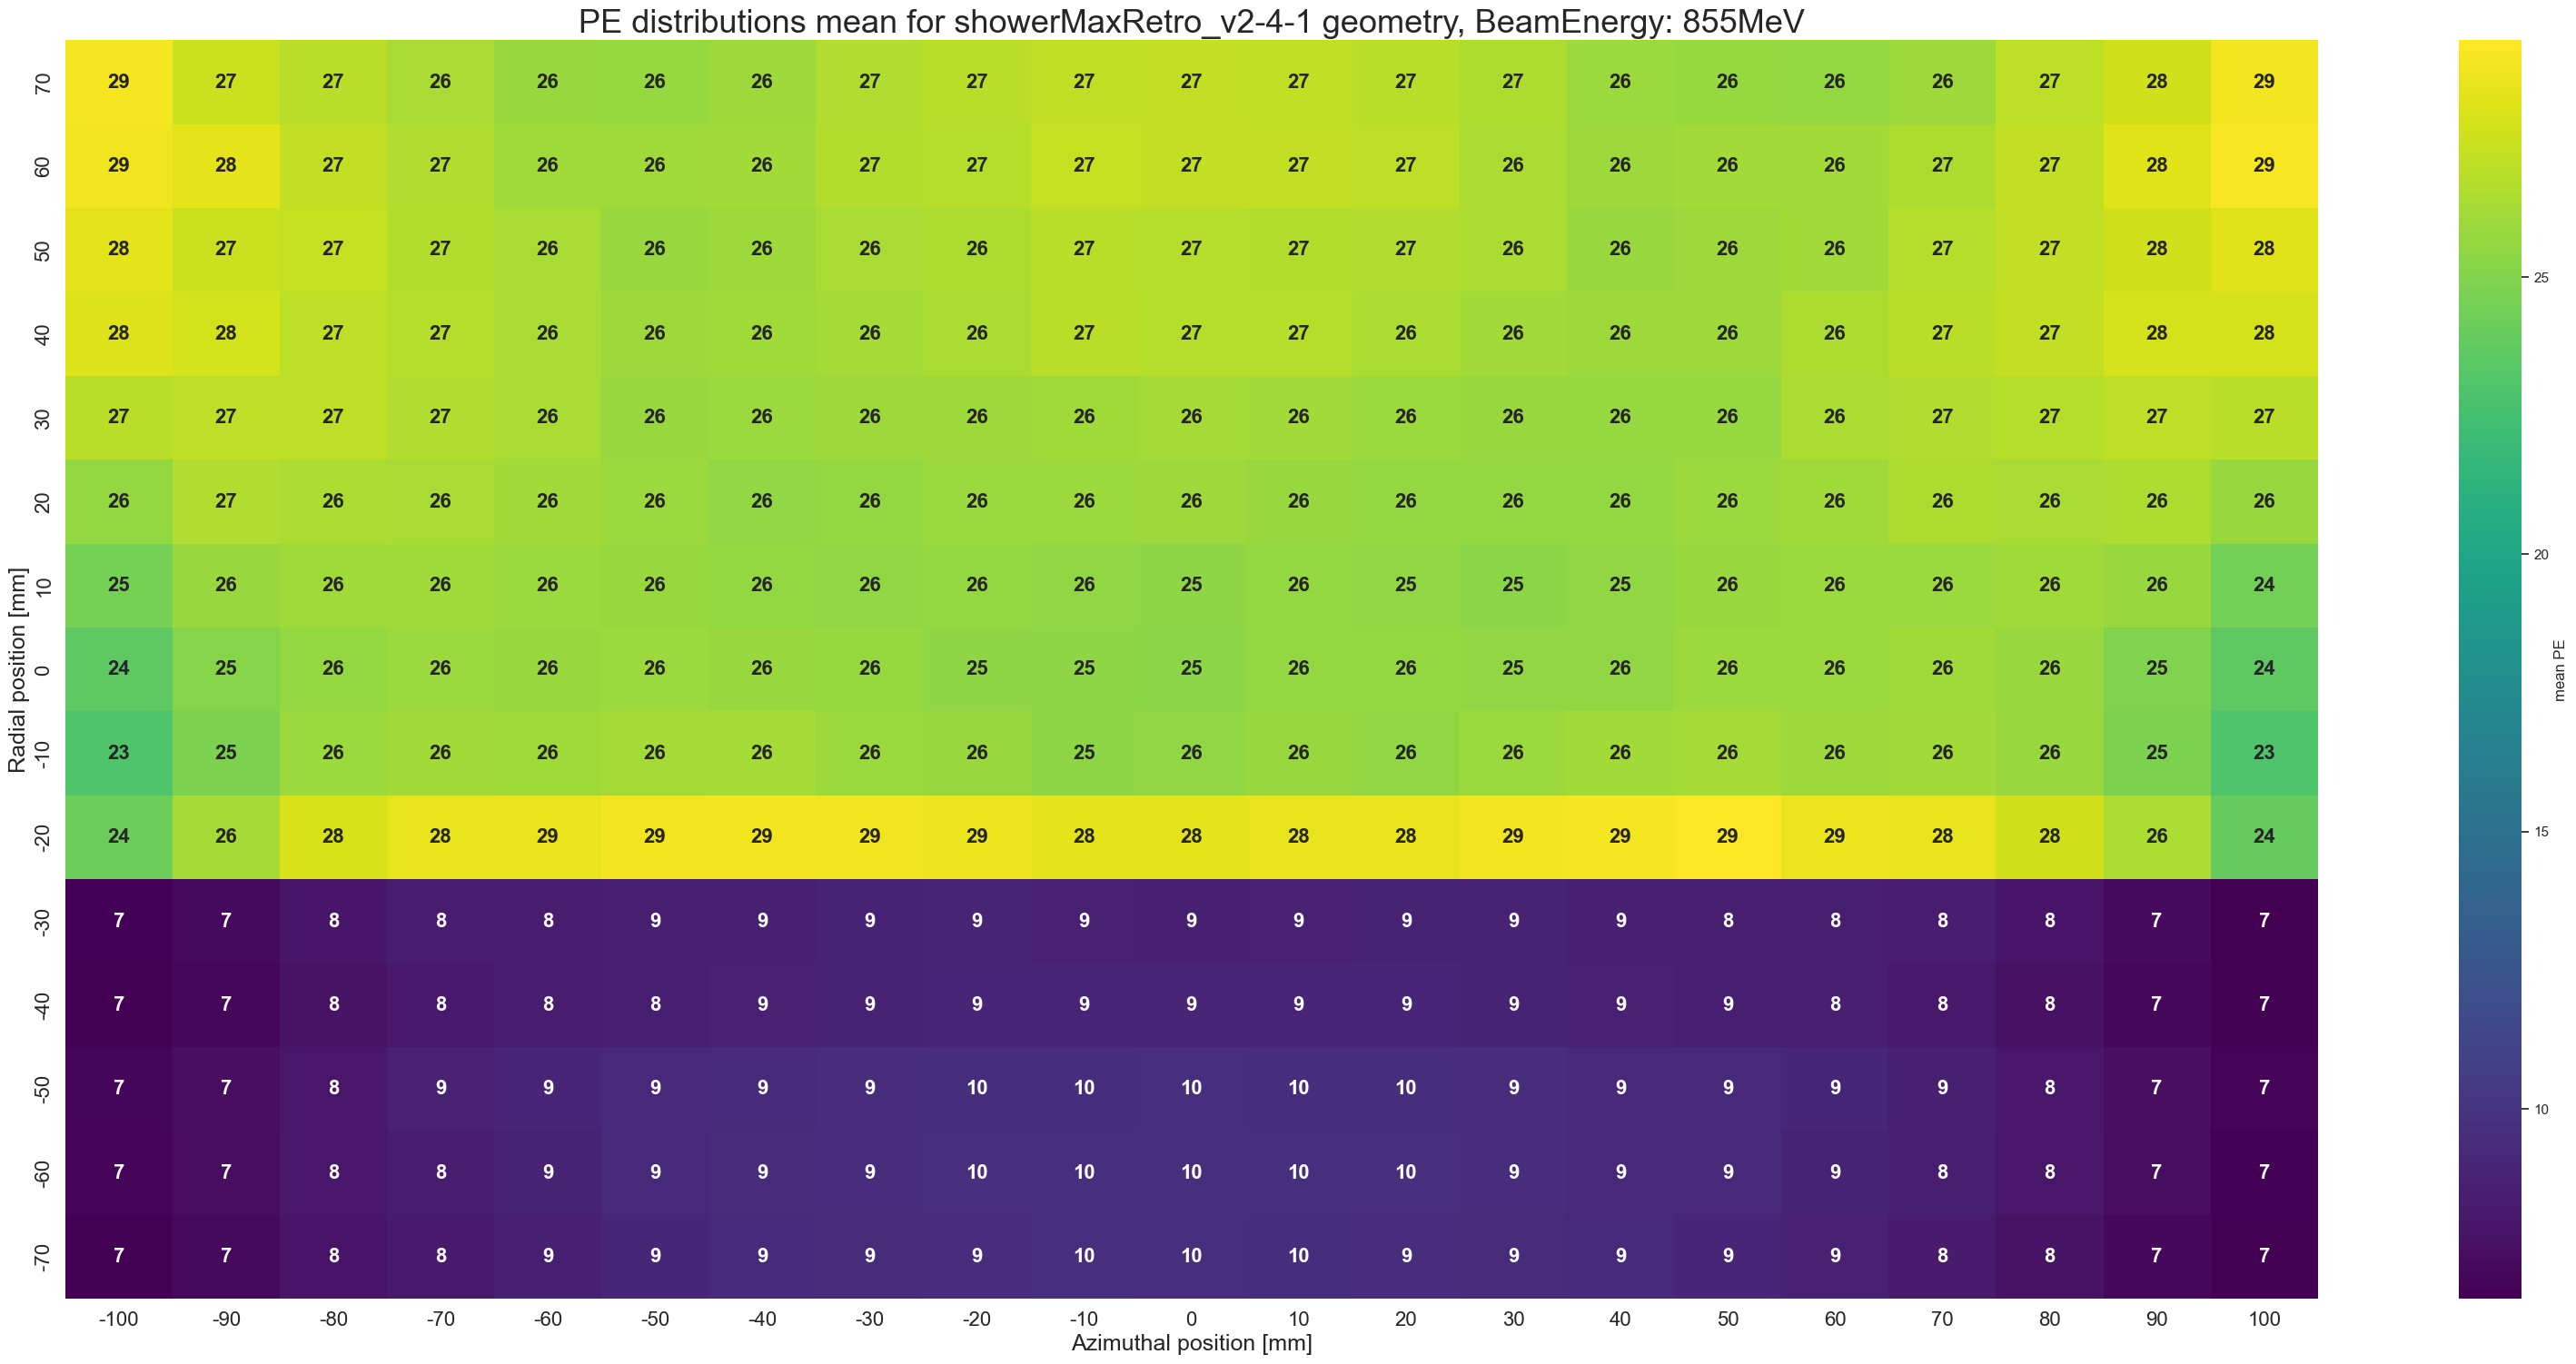

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
sns.set_theme(style="dark")

# Set figure size
plt.figure(figsize=(40, 18))

# Create the heatmap
heatmap = sns.heatmap(df_mean, cmap="viridis", square=False,
                      annot=True, fmt=fmtStr, 
                      annot_kws={"size": 16, "weight": 'bold', 'backgroundcolor': 'none'}, 
                      cbar_kws={'label': f'{variable} PE'})

# Set title
heatmap.set_title(f"PE distributions {variable} for {geometry} geometry, BeamEnergy: {beamEnergy}", fontsize=26)

# Set axis labels
plt.xlabel("Azimuthal position [mm]", fontsize=18)
plt.ylabel("Radial position [mm]", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save and display the plot
output_file = f"../output/plots/{config}/hitn_{variable}_fullScan_{geometry}_{fileNumber}.pdf"
plt.savefig(output_file)
plt.show()


/var/folders/4z/0xl02pt90_xfv0_r4l6t2_l80000gn/T/ipykernel_75971/4069026424.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


NameError: name 'scan_type' is not defined

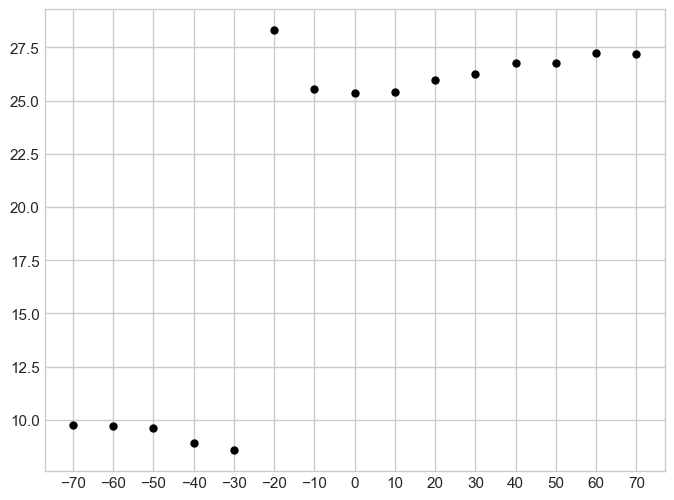

In [12]:
# Define parameters
scan_variable = "Y"  # Specify the scan variable (X or Y)
position = 0  # Specify the position for the scan
if scan_variable == "X":
    scan_type = "azimuthal"
    data = df_mean.loc[position]
    tickerMultiple = 2
elif scan_variable == "Y":
    scantype = "radial"
    data = df_mean[str(position)]  # Select the data from the specific row
    tickerMultiple = 10

# Create figure and axis
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Clip the data if necessary
ax.plot(data[:], 'o', markersize=5, color='black', linewidth=0.8)

# Customize plot
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickerMultiple))
plt.title(f"PE distribution {variable} for {geometry} geometry at {scan_type} position {position}", fontsize=10, weight='bold')
plt.xlabel(f"{scantype} position [mm]", fontdict={'fontsize': 10})
plt.ylabel(f"{variable} PE", fontdict={'fontsize': 10})
plt.grid(axis='both', linestyle=':', linewidth=0.2, color='black')
plt.xticks(rotation=0, ha='center', fontsize=8, minor=True)
plt.yticks(fontsize=9, minor=True)
if variable == "mean":
    plt.savefig(f"../output/plots/{config}/{scan_type}Scan_{geometry}_{scan_variable}{position}.pdf")

# Display plot
plt.show()

<class 'awkward.highlevel.Array'>
[29.3, 29.2, 28.8, 28.3, 27.7, 27.2, 26.9, ... 29.9, 9.21, 9.4, 10.1, 10.3, 10.3]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


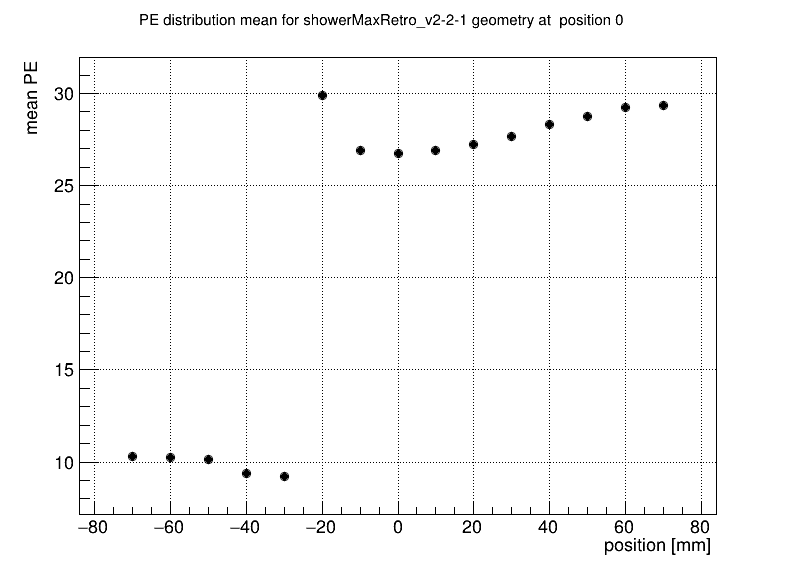

In [ ]:
# %jsroot on
# Plot graph using TGraph
# Create a TGraph object
graph = TGraph()
graph.SetMarkerStyle(20)
# Set the number of points
n_points = len(data)
# Create arrays to store the data with x being the index itself and y the data
x = ak.Array(data.index.astype(float))
y = ak.Array(data.values)
print(type(x))
print(y)
# Fill the TGraph object
for i in range(n_points):
    graph.SetPoint(i, x[i], y[i])

# Create a canvas
canvas = TCanvas("canvas", "canvas", 800, 600)
canvas.SetGrid()
# Draw the TGraph object
graph.Draw("AP")
# Set the title
graph.SetTitle(f"PE distribution {variable} for {geometry} geometry at {scan_type} position {position}")
# Set the axis labels
graph.GetXaxis().SetTitle(f"{scan_type} position [mm]")
graph.GetYaxis().SetTitle(f"{variable} PE")
# Draw the canvas
canvas.Draw()
